Задание: Взять датасет. Обучит классификатор.
Сделать понижение размерности в питоне при помощи pca. 
Постоить roc и auc.

In [1]:
import pandas as pd
import numpy as np
import sklearn

Набор данных был предоставлен одной американской компанией сотовой связи. В ней данные по 3000 абонентам: штат проживания, подключен ли меджунароный тариф, общее время звонков, совершенных днем, ночью, общая плата и др. Целевой переменной является бинарный признак 'Churn', что означает 'отток' - т.е. отказался ли клиент от услуг оператора (true) или остался (false), после некоторого периода пользования услугами.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv')
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


Упростим модель, убрав категориальный признак - Штат('State'), и заменив все yes/no , false/true (целевая) признаки на 0/1.

In [3]:
df = df.drop(['State'], axis=1)

In [4]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = pd.factorize(df['Churn'])[0]

In [5]:
df.head(5)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [22]:
df.shape

(3333, 19)

Разобъем всю выборку на обучающую и тестовую 70/30.

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Масштабируем признаки, с учетом их мат. ожидания и дисперсии.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Обучим дерево-классификатор, не задавая никакие параметры. Не вдаваясь в подробности, дерево-классификатор, строит классификацию по признакам на основе наибольшего уменьшения информационной энтропии на каждом этапе.

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [9]:
# Точность классификатора:
clf.score(X_test_scaled, y_test)

0.908

In [10]:
# Посчитаем точность по-другому, при помощи кросс-валидации
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(clf, X_scaled, y, cv=10)))

0.9186941432450414


In [11]:
# Из classification_report видно, что алгоритм в среднем чаще ошибается, когда классифицирует, что клиент уйдет (1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       855
           1       0.67      0.72      0.70       145

   micro avg       0.91      0.91      0.91      1000
   macro avg       0.81      0.83      0.82      1000
weighted avg       0.91      0.91      0.91      1000



In [12]:
# построим таблицу смежности, из которой так же можно посчитать precision и recall характеристики:
tab = pd.crosstab(np.ravel(y_test), np.ravel(y_pred), margins=True)
tab.index = ['0 - остался действ.', '1 - ушел действ.', 'сумма']
tab.columns = ['0 - остался предск.', '1 - ушел предск.', 'сумма']
tab

,0 - остался предск.,1 - ушел предск.,сумма
0 - остался действ.,803,52,855
1 - ушел действ.,40,105,145
сумма,843,157,1000


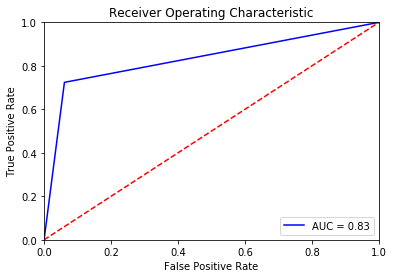

In [71]:
# Построим, ROC кривую, и посчитаем AUC:
import sklearn.metrics as metrics
# 
#reds = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Видим, что AUC = 0.83, что достаточно хорошо, учитывая, что мы не настраивали параметры дерева-классификатора и выкинули целый столбец информации.

Теперь, при помощи PCA, понизим размерность данных. для этого зададим n_components=0.9, т.е модель должна объяснять, минимум, 90 % дисперсии исходных данных:

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [14]:
sum(pca.explained_variance_ratio_) # % дисперсии, который модель pca объясняет

0.9477501511480244

In [15]:
pca.explained_variance_ratio_ #  % дисперсии на каждую компоненту:

array([0.11531244, 0.11289889, 0.11209311, 0.10886413, 0.10632654,
       0.06034943, 0.0583362 , 0.05755056, 0.05605837, 0.05514724,
       0.05261889, 0.05219434])

In [16]:
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)

In [17]:
clf.score(X_test_pca, y_test) #доля верных ответов снизилась на 10%

0.854

In [18]:
# Посчитаем точность по-другому, при помощи кросс-валидации
print(np.mean(cross_val_score(clf, X_test_pca, y_pred_pca, cv=10)))

0.8539610961096109


In [19]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       855
           1       0.50      0.43      0.46       145

   micro avg       0.85      0.85      0.85      1000
   macro avg       0.70      0.68      0.69      1000
weighted avg       0.85      0.85      0.85      1000



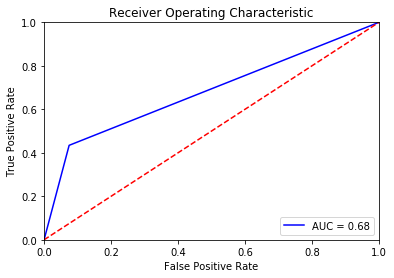

In [21]:
#Посчитаем roc, auc:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#reds = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_pca)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# AUC = 0.68 Заметно снизился (на %15)

Вывод: Понижение размерности c 18 до 12 компонент при помощи PCA, упрощает модель, но заметно снижает точность классификатора, если оценивать его с помошью ROC-кривой. Это может быть потому, что зависимости между лучше будут описаны нелинейными зависимостями, а pca находит только линейные зависимости.